# Part A. Reports on Participants Demographics

Date: April 19, 2019 
Author: Shabnam Haghzare
The following code reports on the number of participants screened- included and gemographics

__Extremely useful resource for power analysis:__
https://rpsychologist.com/d3/NHST/

In [270]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [271]:
# Initialization
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.table as tbl
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 20})

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

__The folwoing will read the dmographics excel sheet and reports the follwong__

* demographics- Age and Years of Education
* Vision: ETDRS: OD & OS
* Cognition: MoCA
* Mood Status

** To be added: p-value of each with acceptance scores on the right

#### Reading the Excel Sheets

In [272]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')


In [273]:
type(Demographics)

pandas.core.frame.DataFrame

In [274]:
Demographics.head()

,Practice Date,Participant Status,Iteration of Design,Manual/Auto Order,Participant Condition Order,Participant Group Order,Participant Completion Order,Age,Sex,Handedness,...,Concentration/Attention Problems,Memory Problems,Difficulty Finding Words,Fallen in the last year,Near Falls Last Year,Fearful of Falling,MoCA Score,Visual Acuity Score (LogMAR)_Right,Visual Acuity Score (LogMAR)_Left,Total Mood Disturbance
Participant ID,,,,,,,,,,,,,,,,,,,,,
1.0,NaT,Did not Come In,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8
2.0,2019-12-07,Exp Incomplete,First,MA,RTB (4),"PM,PA,RM,RA,TM,TA,BM,BA","PM,PA,RM,RA,TM,TA",75.0,F,Right,...,No,No,No,No,No,No,27.0,0.243038,0.243038,-30
3.0,NaT,Did not Come In,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8
4.0,2019-01-25,All Completed,First,MA,RTB (4),"PM,PA,RM,RA,TM,TA,BM,BA","PM,PA,RM,RA,TM,TA,BM,BA",66.0,F,Right,...,No,No,No,No,No,No,27.0,0.161368,0.079181,-32
5.0,2019-02-01,Exp Incomplete,First,AM,RTB (4),"PM,PA,RA,RM,TA,TM,BA,BM","PM,PA,RA,RM",75.0,M,Right,...,No,No,Yes,No,Yes,Yes,26.0,NaN,NaN,-14


## A.2 Plotting the table on current recruitment status

In [275]:
status = Demographics.groupby('Participant Status')
status.groups

{'All Completed': Float64Index([4.0, 7.0, 9.0, 13.0, 19.0, 22.0, 23.0, 25.0, 26.0, 27.0, 28.0,
               33.0, 34.0],
              dtype='float64', name='Participant ID'),
 'Did not Come In': Float64Index([1.0, 3.0, 8.0, 35.0], dtype='float64', name='Participant ID'),
 'Exp Incomplete': Float64Index([2.0, 5.0, 6.0, 10.0, 11.0, 12.0, 14.0, 15.0, 16.0, 18.0, 21.0,
               24.0],
              dtype='float64', name='Participant ID'),
 'Missing Data': Float64Index([32.0], dtype='float64', name='Participant ID'),
 'Practice Completed': Float64Index([20.0, 29.0], dtype='float64', name='Participant ID')}

In [276]:
completed_IDs = np.array(status.groups['All Completed'])[3:]
ss_incompleted_IDs = np.array(status.groups['Exp Incomplete'])
excluded_IDs = np.array(status.groups['Did not Come In'])
practiceDone_IDs = np.array(status.groups['Practice Completed']) #only relevant in the third (Two session) design 

## Those who are going to be analysed are complted and completed-RNs
#Analyzed_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))

In [277]:
completed_IDs

array([13., 19., 22., 23., 25., 26., 27., 28., 33., 34.])

In [278]:
# Below choose which one of the participants is going to be analyzed
Analyzed_IDs = np.sort(completed_IDs)
complete_incomplete_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))

In [279]:
Analyzed_IDs

array([13., 19., 22., 23., 25., 26., 27., 28., 33., 34.])

In [280]:
list((status.groups.keys()))

['All Completed',
 'Did not Come In',
 'Exp Incomplete',
 'Missing Data',
 'Practice Completed']

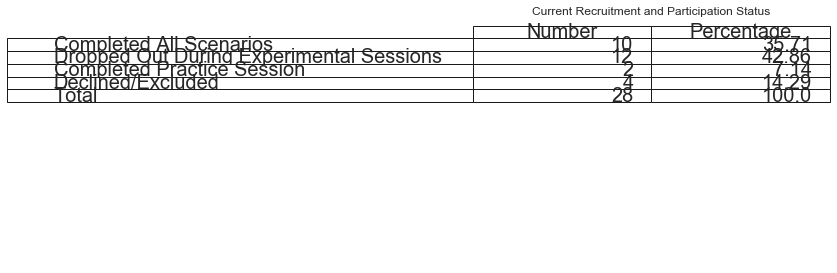

In [281]:
Total = np.sum([np.count_nonzero(completed_IDs)
        ,np.count_nonzero(ss_incompleted_IDs)
        ,np.count_nonzero(practiceDone_IDs)
        ,np.count_nonzero(excluded_IDs)])

participant_counter = [[np.count_nonzero(completed_IDs), (np.count_nonzero(completed_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(ss_incompleted_IDs), (np.count_nonzero(ss_incompleted_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(practiceDone_IDs),(np.count_nonzero(practiceDone_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(excluded_IDs), (np.count_nonzero(excluded_IDs)/Total*100).round(2) ]
        ,[Total, Total/Total*100]]

status_keys = ["Completed All Scenarios", "Dropped Out During Experimental Sessions"
               ,"Completed Practice Session", "Declined/Excluded", "Total"]


fig, ax = plt.subplots()

# hide axes

ax.axis('off')
ax.axis('tight')

ax.table(cellText=participant_counter,
        rowLabels=status_keys,
        colLabels = ["Number", "Percentage"],
        loc='upper center')
        
fig.tight_layout()

plt.title('Current Recruitment and Participation Status')
plt.show()


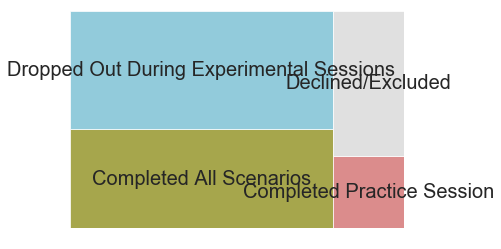

In [282]:
import squarify    # pip install squarify (algorithm for treemap)
 
participant_counter = [np.count_nonzero(completed_IDs)
        ,np.count_nonzero(ss_incompleted_IDs)
        ,np.count_nonzero(practiceDone_IDs)
        ,np.count_nonzero(excluded_IDs)]

        
# If you have 2 lists
squarify.plot(sizes=participant_counter, label= status_keys[0:-1],color=["olive","c", "indianred", "lightgrey"]
              , alpha=.7)
plt.axis('off')
plt.show()


### A.2 Plotting the Demographics 

**From here on we will only look into participants who completed everything or completed-RN.**

The code below reports demographics of participants in "Analyzed_IDs" 

* demographics- Age and Years of Education
* Vision: ETDRS: OD & OS
* Cognition: MoCA


** To do: report the four above items in a Table.

In [283]:
Analyzed_IDs

array([13., 19., 22., 23., 25., 26., 27., 28., 33., 34.])

In [284]:
type(Demographics)

pandas.core.frame.DataFrame

In [285]:
Analyzed_demographics = Demographics.loc[Analyzed_IDs]

In [286]:
Analyzed_demographics.loc[:, 'Highest Level of Education'].nunique

<bound method IndexOpsMixin.nunique of Participant ID
13.0         Graduate
19.0     Professional
22.0         Graduate
23.0    Undergraduate
25.0     Professional
26.0     Professional
27.0         Graduate
28.0         Graduate
33.0    Undergraduate
34.0     Professional
Name: Highest Level of Education, dtype: object>

Text(0.5, 1.0, 'Histogram of Age')

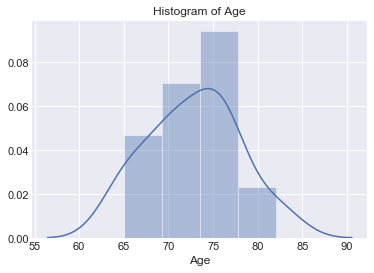

In [287]:
sns.distplot(Analyzed_demographics['Age'])
plt.title('Histogram of Age')

(0.929740309715271, 0.44534265995025635)

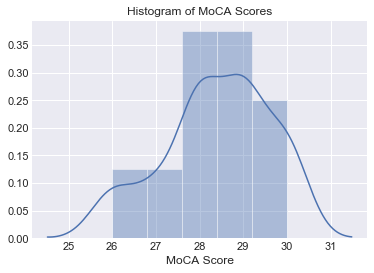

In [288]:
sns.distplot(Analyzed_demographics['MoCA Score'])
plt.title('Histogram of MoCA Scores')
stats.shapiro(Analyzed_demographics['MoCA Score'])

Text(0.5, 1.0, 'Years of Driving Experience')

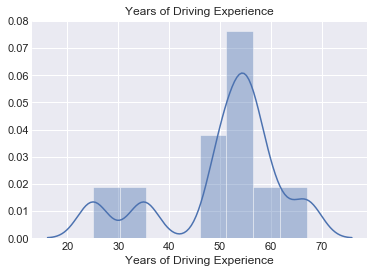

In [289]:
Analyzed_demographics.loc[:,'Years of Driving Experience']= Analyzed_demographics.loc[:,'Years of Driving Experience'].astype(float)
sns.distplot(Analyzed_demographics['Years of Driving Experience'])
plt.title('Years of Driving Experience')

In [290]:
Analyzed_demographics["Years of Driving Experience"]

Participant ID
13.0    54.0
19.0    54.0
22.0    50.0
23.0    56.0
25.0    50.0
26.0    67.0
27.0    25.0
28.0    60.0
33.0    35.0
34.0    56.0
Name: Years of Driving Experience, dtype: float64

In [291]:
Analyzed_demographics.mean()

Age                                   72.800000
Years of Driving Experience           50.700000
MoCA Score                            28.400000
Visual Acuity Score (LogMAR)_Right     0.161632
Visual Acuity Score (LogMAR)_Left      0.236464
Total Mood Disturbance               -23.900000
dtype: float64

In [292]:
Analyzed_demographics.std()

Age                                    5.181162
Years of Driving Experience           12.193350
MoCA Score                             1.264911
Visual Acuity Score (LogMAR)_Right     0.111842
Visual Acuity Score (LogMAR)_Left      0.118914
Total Mood Disturbance                 9.255029
dtype: float64

# Part B. POMS Scores

The following code will read the POMS scores of Analyzed_ID participants.

1. Compute the t-score with the following formula
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-distribution/t-score-formula/

Step 1, calculate z-score:
$$ Z = \frac{RawScore - \mu}{\sigma} $$

Step 2, calculate t-score from z-score:
$$ T = (Z x 10) + 50 $$


**Note:** The higher the POMS total, the lower is the mood.

In [293]:
# Reading the mood scores of complete & Incomplete participants

# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
POMS = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "POMS Scoring Key")
POMS = POMS.set_index('Participant ID')

complete_and_incmoplete_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))
CIC_POMS = POMS.loc[complete_and_incmoplete_IDs]

Analyzed_POMS = POMS.loc[Analyzed_IDs]

In [294]:
Analyzed_POMS

,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,
13.0,2.0,0.0,1,0,14,8,1,-18
19.0,2.0,0.0,4,0,18,9,0,-21
22.0,6.0,1.0,4,1,15,10,2,-11
23.0,5.0,0.0,2,0,18,9,9,-11
25.0,0.0,0.0,0,0,17,7,0,-24
26.0,0.0,0.0,1,0,17,14,3,-27
27.0,2.0,0.0,1,2,18,12,0,-25
28.0,0.0,0.0,0,0,23,18,0,-41
33.0,4.0,0.0,0,1,19,15,0,-29


## B.1 Computing POMS t-score

In [295]:
# compute the t-score over 7 different scales nad the total scale

def scale_stats(df, ScaleString):
    mu    = df.loc[:,ScaleString].mean()
    sigma = df.loc[:,ScaleString].std()
    tscores = 50 + 10 * (df.loc[:,ScaleString]-mu) / sigma
    return mu, sigma, tscores

TEN_mean, TEN_std, TEN_tscores = scale_stats(Analyzed_POMS, 'Tension Score')
ANG_mean, ANG_std, ANG_tscores = scale_stats(Analyzed_POMS, 'Anger Score')
FAT_mean, FAT_std, FAT_tscores = scale_stats(Analyzed_POMS, 'Fatigue Score')
DEP_mean, DEP_std, DEP_tscores = scale_stats(Analyzed_POMS, 'Depression Score')
ERA_mean, ERA_std, ERA_tscores = scale_stats(Analyzed_POMS, 'Esteem-related affect Score')
VIG_mean, VIG_std, VIG_tscores = scale_stats(Analyzed_POMS, 'Vigor Score')
CON_mean, CON_std, CON_tscores = scale_stats(Analyzed_POMS, 'Confusion Score')
TOT_mean, TOT_std, TOT_tscores = scale_stats(Analyzed_POMS, 'Total Mood Disturbance')

POMS_tscores_Analyzed = pd.concat([TEN_tscores, ANG_tscores, FAT_tscores, DEP_tscores, ERA_tscores, VIG_tscores
                                             , CON_tscores, TOT_tscores], axis = 1)

In [296]:
POMS_tscores_Analyzed

,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,
13.0,49.552289,46.837722,48.085540,44.279224,35.181798,40.830071,48.238339,56.374913
19.0,49.552289,46.837722,67.230143,44.279224,49.638580,43.695674,44.715018,53.133432
22.0,67.460742,78.460499,67.230143,58.581163,38.795994,46.561277,51.761661,63.938369
23.0,62.983629,46.837722,54.467074,44.279224,49.638580,43.695674,76.424910,63.938369
25.0,40.598062,46.837722,41.704005,44.279224,46.024385,37.964469,44.715018,49.891951
26.0,40.598062,46.837722,48.085540,44.279224,46.024385,58.023688,55.284982,46.650470
27.0,49.552289,46.837722,48.085540,72.883102,49.638580,52.292482,44.715018,48.811457
28.0,40.598062,46.837722,41.704005,44.279224,67.709558,69.486098,44.715018,31.523558
33.0,58.506515,46.837722,41.704005,58.581163,53.252776,60.889290,44.715018,44.489482


Text(0.5, 1.0, 'Histogram of Normalized Total Mood Disturbance')

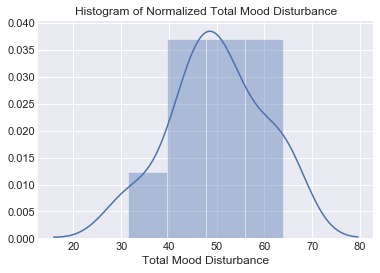

In [297]:
sns.distplot(POMS_tscores_Analyzed['Total Mood Disturbance'])
plt.title('Histogram of Normalized Total Mood Disturbance')

## Part C.Analyzing the Acceptability Scores

In the following code:

3.1 Internal Validity with Cronbach’s Alpha; with alpha > 0.7 criteria recommended by Nunnally (1978)
3.2 The acceptability scores will be corrected by deleting the items resultig in low internal consistency.
3.3 Correlation analyses were conducted including all of the variables to check for multicollinearity

__!Note: Under PC scale/dangerous item is reversed after reading the data.__

In [298]:
# Reading the acceptability scores of Analyzed IDs

# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

def read_acc_questionnaire(excel, worksheet, AVAM):
    df = pd.read_excel(Qualitative_Path + excel + ".xlsx", sheet_name = worksheet)
    df.columns = df.loc[0,:]
    df.drop(index = 0)
    df = df.set_index('Participant ID')
    df = df.drop(index = 'Participant ID')
    
    if AVAM == True:
        df['dangerous'] = list(8 - df['dangerous'])
        df['Concerns'] = list(8 - df['Concerns'])
        df['Frightening'] = list(8 - df['Frightening'])
        df["don't understand"] = list(8 - df["don't understand"])
        
    ## Looking only into the ones picked for analysis
    #Analyzed_IDs_2 = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))
    Analyzed_df = df.loc[Analyzed_IDs].dropna()
    
    return df, Analyzed_df

# reading the acceptance masterlist into a dataframe--- index = participant ID, colums = feature label
ACC_master, Analyzed_ACC_master = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_MasterList", False)

# Pre-exposure acceptability questionnaire
ACC_PRE, Analyzed_ACC_PRE       = read_acc_questionnaire("AcceptabilityQuestionnaires", "PRE", False)

# Post exposure acceptability questionnaire
ACC_POST, Analyzed_ACC_POST     = read_acc_questionnaire("AcceptabilityQuestionnaires", "POST", False)

# Rain acceptability questionnaire - and inversing one item in the percieved safety scale
ACC_Rain, Analyzed_ACC_Rain     = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Rain", True)

# Normal questionnaire - and inversing one item in the percieved safety scale
ACC_Norm, Analyzed_ACC_Norm      = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Normal", True)

# Traffic questionnaire - and inversing one item in the percieved safety scale
ACC_Trfc, Analyzed_ACC_Traffic     = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Traffic", True)


In [299]:
Analyzed_ACC_Traffic

,Date,Status,quickly,Cost efficiently,Safely,Easy to Use,Clear & Understandable,Easy to learn,Proud to show,Widely Used,...,plan to obtain,dangerous,feel safe,trust,Drive More often,More comfortable,Waiting for AV failure,AV consider to be mobility assistance,AV than others driving me,AV than accessibility transport
Participant ID,,,,,,,,,,,,,,,,,,,,,
13,2019-06-11 00:00:00,Completed,4,4,6,7,6,6,7,7,...,7,5.0,5,5,3,5,5,7,7,4
19,2019-05-16 00:00:00,Completed,5,4,3,6,6,6,5,5,...,3,3.0,3,5,5,4,2,2,3,3
22,2019-05-21 00:00:00,Completed,5,5,4,5,3,4,5,5,...,4,3.0,3,4,4,4,3,5,5,3
23,2019-05-23 00:00:00,Completed,6,6,4,5,5,6,3,3,...,3,2.0,2,2,6,6,6,6,6,2
25,2019-05-10 00:00:00,Completed,6,4,6,4,5,5,6,5,...,5,6.0,4,3,5,3,2,5,6,5
26,2019-05-22 00:00:00,Completed,2,2,2,6,6,7,2,1,...,1,2.0,1,1,1,1,6,1,1,1
27,2019-05-31 00:00:00,Completed,7,6,6,6,7,7,6,7,...,6,6.0,6,6,4,5,1,4,7,7
28,2019-05-28 00:00:00,Completed,4,4,6,7,7,7,7,4,...,7,7.0,7,7,4,4,2,4,5,5
33,2019-05-30 00:00:00,Completed,7,7,7,7,7,7,7,1,...,7,6.0,7,6,2,7,1,7,7,7


## C.1 ACC Factors Internal Consistency

Cronbach’s Alpha is calculated using the following formula:
https://data.library.virginia.edu/using-and-interpreting-cronbachs-alpha/

$$ \alpha = (\frac{K}{K-1})(1- \frac{\sum_{i=1}^{k}{\sigma^2_{y_i}} }{\sigma^2_x}) $$

In [300]:
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

# Below is a list of question for each scale
PE_scale_items = ['quickly','Cost efficiently','Safely']
EE_scale_items = ['Easy to Use','Clear & Understandable','Easy to learn']
SI_scale_items = ['Proud to show','Widely Used','Passengers']
FC_scale_items = ['Control Over the Journey','Knowledge Necessary','Infrastructure']
AT_scale_items = ['Good idea','More Interesting','Fun']
SE_scale_items = ['Built-in assistance','no assistance','help of a person']
AN_scale_items = ['Concerns','Frightening',"don't understand"]
IU_scale_items = ['Predict to use','plan to obtain']
PC_scale_items = ['dangerous','feel safe','trust']

### Method-2 Works!-- Each ACC questionnaire from any condition and any participant in incldued and treated as one pobservation

In [301]:
## Now we will concat the traffic, rain and norm acceptability scales to get an alpha for all observations (two from each person)


PE_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, PE_scale_items], Analyzed_ACC_Rain.loc[:, PE_scale_items], 
                    Analyzed_ACC_Traffic.loc[:, PE_scale_items]])
                   
EE_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, EE_scale_items], Analyzed_ACC_Rain.loc[:, EE_scale_items],
                    Analyzed_ACC_Traffic.loc[:, EE_scale_items]]) 
                   
SI_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, SI_scale_items], Analyzed_ACC_Rain.loc[:, SI_scale_items],
                    Analyzed_ACC_Traffic.loc[:, SI_scale_items]])   
                   
FC_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, FC_scale_items], Analyzed_ACC_Rain.loc[:, FC_scale_items],
                   Analyzed_ACC_Traffic.loc[:, FC_scale_items]])
                   
AT_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, AT_scale_items], Analyzed_ACC_Rain.loc[:, AT_scale_items],
                   Analyzed_ACC_Traffic.loc[:, AT_scale_items]])
                   
SE_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, SE_scale_items], Analyzed_ACC_Rain.loc[:, SE_scale_items],
                   Analyzed_ACC_Traffic.loc[:, SE_scale_items]])
                  
AN_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, AN_scale_items], Analyzed_ACC_Rain.loc[:, AN_scale_items],
                   Analyzed_ACC_Traffic.loc[:, AN_scale_items]])
                   
IU_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, IU_scale_items], Analyzed_ACC_Rain.loc[:, IU_scale_items],
                   Analyzed_ACC_Traffic.loc[:, IU_scale_items]])
                   
PC_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, PC_scale_items], Analyzed_ACC_Rain.loc[:, PC_scale_items],
                   Analyzed_ACC_Traffic.loc[:, PC_scale_items]])



alphas = pd.DataFrame(index = ['pre-adjust', 'post-adjust'])

alphas.loc['pre-adjust','PE'] = cronbach_alpha(PE_RNT)
alphas.loc['pre-adjust','EE'] = cronbach_alpha(EE_RNT)
alphas.loc['pre-adjust','SI'] = cronbach_alpha(SI_RNT)
alphas.loc['pre-adjust','FC'] = cronbach_alpha(FC_RNT)
alphas.loc['pre-adjust','AT'] = cronbach_alpha(AT_RNT)
alphas.loc['pre-adjust','SE'] = cronbach_alpha(SE_RNT)
alphas.loc['pre-adjust','AN'] = cronbach_alpha(AN_RNT)
alphas.loc['pre-adjust','IU'] = cronbach_alpha(IU_RNT)
alphas.loc['pre-adjust','PC'] = cronbach_alpha(PC_RNT)

alphas

,PE,EE,SI,FC,AT,SE,AN,IU,PC
pre-adjust,0.891987,0.846226,0.68995,0.536682,0.946045,0.462397,0.714843,0.95382,0.974948
post-adjust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## C.2 The next step is to identify those subscale who if deleted will increase the internal consistency
 for instance in the scale of anxiety, if we get rid of the 'I don't understand', we will get a higher internal consistency'
 

In [302]:
# this code reports the items that need to be further adjusted which have alpha<0.7
inconsistent_scales = []
for content in alphas.loc['pre-adjust'].items():
    inconsistent_scales.append(content[0]) 
    if content[1] < 0.7:
        print(content[0])

SI
FC
SE


In [303]:
#for i in inconsistent_scales:
#    alphas.loc['post-adjust',content[0]] = cronbach_alpha

In [304]:
# For now we will be doing this manually- Adjust section 2 with the scales reported above to be inconsistent

FC_scale_items = ['Control Over the Journey','Knowledge Necessary','Infrastructure']
AN_scale_items = ['Concerns','Frightening',"don't understand"]
SI_scale_items = ['Proud to show','Widely Used','Passengers']

def find_nonesense_item_in_scale(scale_item):
    comparison_alphas = np.zeros(3)
    for i in range(len(scale_item)):
        help_list = scale_item[0:4]
        del help_list[i]
        concat_RNT = pd.concat([Analyzed_ACC_Norm.loc[:, help_list], Analyzed_ACC_Rain.loc[:, help_list],Analyzed_ACC_Traffic.loc[:, help_list]])
        comparison_alphas[i] = cronbach_alpha(concat_RNT)
    return comparison_alphas.max(), scale_item[comparison_alphas.argmax()]

 
alphas.loc['post-adjust','FC'], alphas.loc['deleted scale', 'FC'] = find_nonesense_item_in_scale(FC_scale_items)
alphas.loc['post-adjust','SE'], alphas.loc['deleted scale', 'SE'] = find_nonesense_item_in_scale(SE_scale_items)
alphas.loc['post-adjust','SI'], alphas.loc['deleted scale', 'SI'] = find_nonesense_item_in_scale(SI_scale_items)

alphas

,PE,EE,SI,FC,AT,SE,AN,IU,PC
pre-adjust,0.891987,0.846226,0.68995,0.536682,0.946045,0.462397,0.714843,0.95382,0.974948
post-adjust,NaN,NaN,0.652482,0.621866,NaN,0.809621,NaN,NaN,NaN
deleted scale,NaN,NaN,Proud to show,Knowledge Necessary,NaN,help of a person,NaN,NaN,NaN


### 3.2.1 We will now be deleting the items under each scale that resulted in low internal consistency. i.e., third rows in alphas.
- we will also delete the name in the list.

__NOTE: The rain and normal acc scores are replaced with a copy not containing the inconsistent items__

In [305]:
Analyzed_ACC_Norm.drop(columns = [alphas.loc['deleted scale', 'SE'], alphas.loc['deleted scale', 'FC'], alphas.loc['deleted scale', 'SI']])
Analyzed_ACC_Rain.drop(columns = [alphas.loc['deleted scale', 'SE'], alphas.loc['deleted scale', 'FC'], alphas.loc['deleted scale', 'SI']])
Analyzed_ACC_Traffic.drop(columns = [alphas.loc['deleted scale', 'SE'], alphas.loc['deleted scale', 'FC'],alphas.loc['deleted scale', 'SI']])

FC_scale_items.remove(alphas.loc['deleted scale', 'FC'])
SE_scale_items.remove(alphas.loc['deleted scale', 'SE'])
SI_scale_items.remove(alphas.loc['deleted scale', 'SI'])

## C.3 Now we will be looking at the correlation between different scales of acceptabiliy

__!NOTE:The Anxiety Scale is reversed for the cluster map but not for the correlation map.__  

- We wil first stack all items under each of the scales.
- Then get a mean value for each scale. 
- Get a correlation analysis for all.
- We will repeat with median as the indicator of each scale. 

In [307]:
## Choose mean or median
def stack_scales_of_acc(input_df):
    scale_index = input("choose the scale representing each scale?")
    acc_scales_stacked = pd.DataFrame()
    if scale_index == 'mean':
        acc_scales_stacked.loc[:,'Performance Expectancy'] = input_df.loc[:,PE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Effort Expectancy'] = input_df.loc[:,EE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Social Influence'] = input_df.loc[:,SI_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Facilitating Conditions'] = input_df.loc[:,FC_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Attitude'] = input_df.loc[:,AT_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Self Efficacy'] = input_df.loc[:,SE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Anxiety'] = input_df.loc[:,AN_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Intention to Use'] = input_df.loc[:,IU_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Percieved Safety'] = input_df.loc[:,PC_scale_items].mean(1)
    elif scale_index == 'median':
        acc_scales_stacked.loc[:,'Performance Expectancy'] = input_df.loc[:,PE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Effort Expectancy'] = input_df.loc[:,EE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Social Influence'] = input_df.loc[:,SI_scale_items].median(1)
        acc_scales_stacked.loc[:,'Facilitating Conditions'] = input_df.loc[:,FC_scale_items].median(1)
        acc_scales_stacked.loc[:,'Attitude'] = input_df.loc[:,AT_scale_items].median(1)
        acc_scales_stacked.loc[:,'Self Efficacy'] = input_df.loc[:,SE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Anxiety'] = input_df.loc[:,AN_scale_items].median(1)
        acc_scales_stacked.loc[:,'Intention to Use'] = input_df.loc[:,IU_scale_items].median(1)
        acc_scales_stacked.loc[:,'Percieved Safety'] = input_df.loc[:,PC_scale_items].median(1)
    return acc_scales_stacked 
    
rain_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Rain)
norm_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Norm)
trfc_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Traffic)

choose the scale representing each scale?mean
choose the scale representing each scale?mean
choose the scale representing each scale?mean


In [308]:
norm_acc_stacked

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety
Participant ID,,,,,,,,,
13,5.666667,6.000000,5.5,5.0,5.333333,5.0,5.666667,7.0,5.333333
19,4.666667,6.000000,5.0,4.0,4.666667,2.5,3.666667,5.0,3.666667
22,5.000000,5.666667,5.0,3.0,4.666667,3.0,3.000000,4.5,3.666667
23,5.000000,6.000000,4.5,3.0,5.000000,6.0,4.000000,3.5,2.000000
25,5.333333,4.000000,4.5,4.5,5.000000,3.0,4.333333,5.0,4.333333
26,2.000000,5.333333,2.0,2.0,1.000000,5.5,2.000000,1.0,1.000000
27,6.000000,7.000000,7.0,5.0,6.333333,6.0,5.666667,7.0,6.666667
28,4.666667,6.666667,4.0,6.5,7.000000,7.0,6.666667,7.0,6.666667
33,6.333333,7.000000,4.0,3.0,5.333333,7.0,3.000000,6.0,7.000000


### Correlation Matrix- ACC Combined
** Towards better heatmap and correlation matrix plots
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

**Spearman Coorelation:**
Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines.

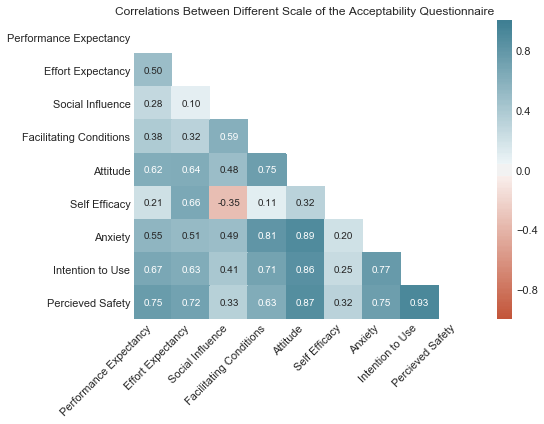

In [309]:
%matplotlib inline
sns.set_style('ticks')

# this will results in condition x analyzied num of participants as observations
concat_RNT  = pd.concat([rain_acc_stacked, norm_acc_stacked, trfc_acc_stacked])
concat_RNT = concat_RNT.apply(lambda x: pd.to_numeric(x, errors='ignore'))
#concat_RNT.to_csv(path_or_buf= r"C:\Users\haghzaS\Documents\0-MAIN_STUDIES\
#01- Acceptability of AVs\Data Analysis\Qualitative_Data_Analysis\Version Control_April-19-2019\R-Exports\export_concat_RNT.csv", index = None, header=True)

corr_matrix = concat_RNT.corr(method='spearman')

# mask for upper traingle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 

# vmin and vmax control the range of the colormap
#cmap='RdBu'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

### Clustermap

Clustermaps make correlations especially informative in analyzing survey responses, because they use hierarchical clustering to (in this case) group benefits together by how closely related they are.

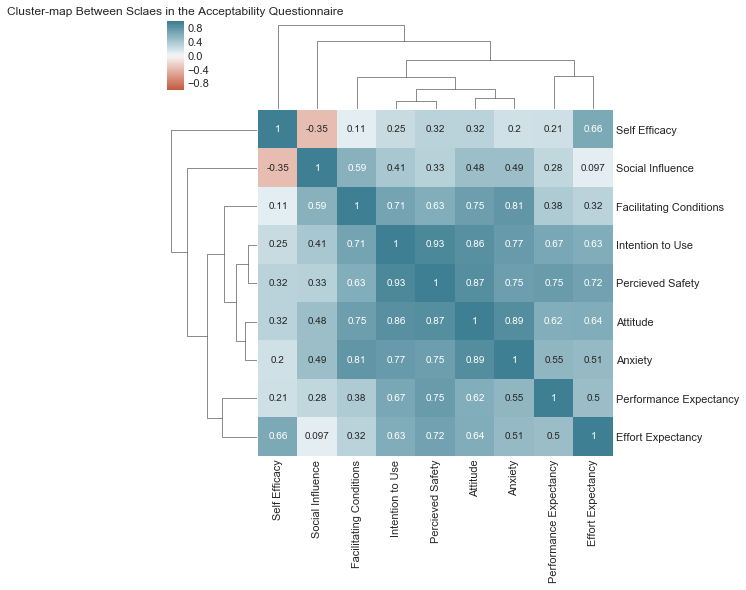

In [310]:
plt.rcParams.update({'font.size': 10})
concat_RNT_anx_reverse = concat_RNT.copy()
#concat_RNT_anx_reverse['Anxiety'] = list(8- concat_RNT_anx_reverse['Anxiety'])
corr_matrix_anx_reversed = concat_RNT_anx_reverse.corr(method='spearman')


sns.clustermap(corr_matrix_anx_reversed, method='ward', cmap=sns.diverging_palette(20, 220, n=200), annot=True,
               vmin=-1, vmax=1, figsize=(8,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.title("Cluster-map Between Sclaes in the Acceptability Questionnaire")



plt.show()

## Acceptability across RTN 

In [311]:
norm_acc_stacked.mean(1)

Participant ID
13    5.611111
19    4.351852
22    4.166667
23    4.333333
25    4.444444
26    2.425926
27    6.296296
28    6.240741
33    5.407407
34    2.203704
dtype: float64

In [312]:
trfc_acc_stacked.mean(1)

Participant ID
13    5.481481
19    4.481481
22    4.166667
23    3.851852
25    4.685185
26    2.648148
27    6.055556
28    6.259259
33    5.277778
34    2.907407
dtype: float64

In [313]:
rain_acc_stacked.mean(1)

Participant ID
13    5.111111
19    4.648148
22    3.981481
23    3.777778
25    4.592593
26    2.185185
27    6.055556
28    6.462963
33    5.277778
34    2.833333
dtype: float64

## C.4 Below, ACC Scores and Demographics

- Linear regression of acceptability scores (y; rain, normal and total) by age
- linear regression of acceptability scores (y; rain, normal and total) by MoCA scores
- Linear regression of acceptability scores (y; rain, normal and total) by years of driving experience
- Visual Acquity Score (LogMAR)_Right 
- Visual Acquity Score (LogMAR)_Left

#### 3.4.1 We will first look at the demographics themselves and how they correlate:

In [314]:
#eveyone_demographics = Demographics.loc[complete_incomplete_IDs]

In [315]:
# first we will get the countable measures of interest from dempgraphics
countable_demographics = Analyzed_demographics.copy()
countable_demographics_measures = ['Age', 'Years of Driving Experience', 'MoCA Score',
                                                    'Visual Acuity Score (LogMAR)_Right',
                                                    'Visual Acuity Score (LogMAR)_Left']

countable_demographics = countable_demographics.loc[:,countable_demographics_measures]
countable_demographics["Mean Visual Acuity"] = 1/2*(countable_demographics['Visual Acuity Score (LogMAR)_Right']+
                                                    countable_demographics['Visual Acuity Score (LogMAR)_Left'])
countable_demographics.drop(columns = ['Visual Acuity Score (LogMAR)_Right',
                                                    'Visual Acuity Score (LogMAR)_Left'], inplace = True)

demographics_corr_matrix = countable_demographics.corr(method = 'pearson')
demographics_corr_matrix.to_csv('democorr.csv', index=True)

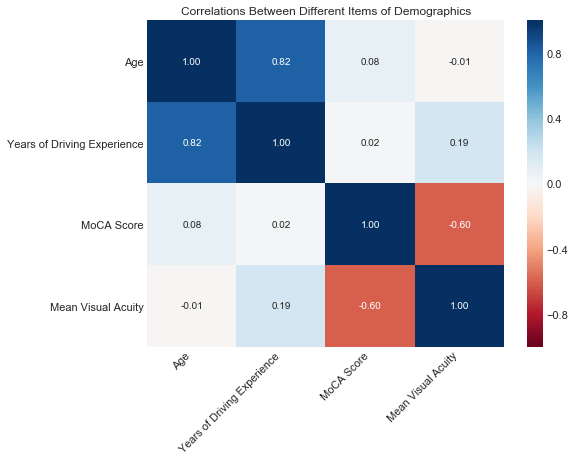

In [316]:
# Drawing the correlation map between the countable demographics
cmap='RdBu'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(demographics_corr_matrix , cmap=cmap, annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)


plt.title("Correlations Between Different Items of Demographics")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

The dark red colour represents that there is no linear relationship between the two variables. A darker blue shade shows that the relationship between the variables is more linear.

#### 3.4.2 Below, we will look at the TOTAL ACC and Subscales as a function of age, MoCA, years of driving and LogMAR

In [317]:
## we will take total scales in acc and concat them 
def add_total_scores_to_scenario_acc(df_in, scenario_string):
    df_copy = df_in.copy()
    df_copy.loc[:,"Median Acceptability"] = df_in.median(1)
    df_copy.loc[:,"Mean Acceptability"] = df_in.mean(1)
    df_copy.loc[:,"Driving Condition"] = scenario_string
    return df_copy

rain_acc_totals = add_total_scores_to_scenario_acc(rain_acc_stacked, "Rain")
norm_acc_totals = add_total_scores_to_scenario_acc(norm_acc_stacked, 'Norm')
trfc_acc_totals = add_total_scores_to_scenario_acc(trfc_acc_stacked, 'Traffic')

acc_total_per_scenario = pd.concat([norm_acc_totals, rain_acc_totals, trfc_acc_totals],0)

acc_total_per_scenario #: acc scores across all scales + total for each scenario in a row
acc_total_per_scenario.to_csv(path_or_buf = Qualitative_Path + "\File Plugs to Quantitative Analysis\\acc_ID.csv")

In [318]:
acc_total_per_per_participant = acc_total_per_scenario.groupby('Participant ID').mean()
acc_total_per_per_participant
#: acc scores (mean) across all scales + total for each participants in a row

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability
Participant ID,,,,,,,,,,,
13,5.444444,6.000000,5.500000,5.000000,5.111111,4.666667,5.000000,6.666667,5.222222,5.166667,5.401235
19,4.444444,6.000000,5.166667,4.333333,4.888889,3.666667,3.777778,4.500000,3.666667,4.555556,4.493827
22,4.666667,4.777778,4.833333,3.833333,3.888889,3.833333,3.111111,4.666667,3.333333,4.333333,4.104938
23,5.222222,5.555556,3.333333,3.500000,4.111111,5.666667,3.666667,2.833333,2.000000,3.833333,3.987654
25,5.222222,4.555556,4.500000,4.166667,5.111111,3.500000,4.666667,5.000000,4.444444,4.611111,4.574074
26,2.000000,5.444444,1.333333,2.000000,1.000000,5.166667,2.555556,1.166667,1.111111,1.833333,2.419753
27,6.222222,6.777778,6.666667,5.000000,6.111111,5.666667,6.222222,6.333333,6.222222,6.222222,6.135802
28,5.111111,6.888889,4.000000,6.500000,7.000000,6.833333,6.777778,7.000000,6.777778,6.777778,6.320988
33,6.777778,7.000000,3.000000,2.833333,5.111111,6.333333,3.555556,6.500000,6.777778,5.944444,5.320988


#### Exploring if there is a monotonic (spearman) or linear (pearson) relashionship between demographics and ACC scores

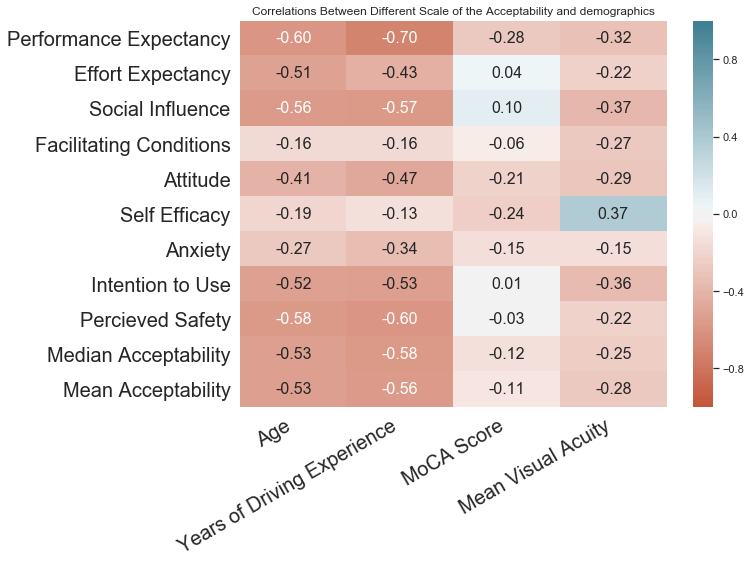

In [367]:
## data = pd.concat([acc_total_per_per_participant, countable_demographics],1)
#data['Anxiety'] = list(8- data['Anxiety'])

acc_demo_corr = data.corr(method = 'pearson').loc[acc_total_per_per_participant.keys(), countable_demographics.keys()]

fig, ax = plt.subplots(figsize=(11, 8))#figsize=(11, 9) 
sns.heatmap(acc_demo_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0, annot_kws={"size": 16})

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize = 20);
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 20);

plt.title("Correlations Between Different Scale of the Acceptability and demographics")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


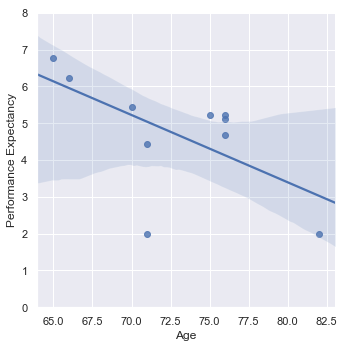

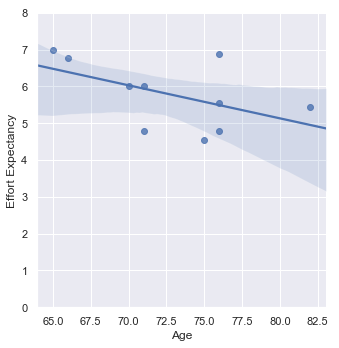

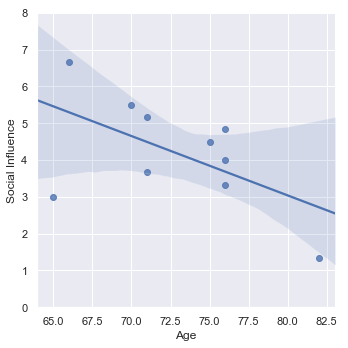

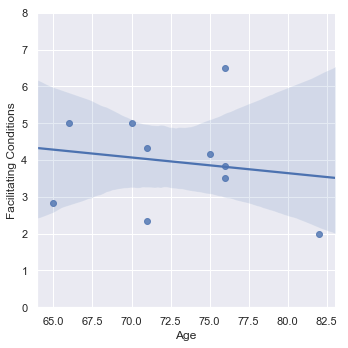

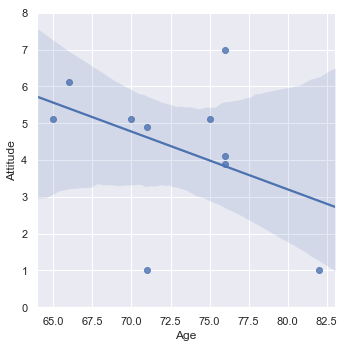

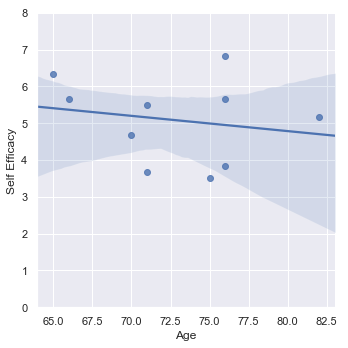

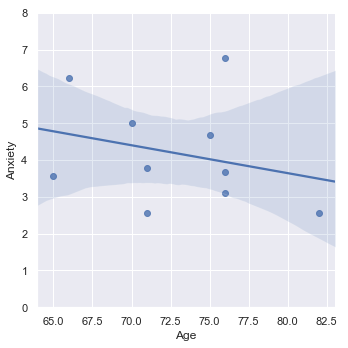

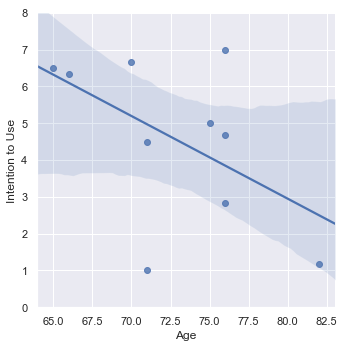

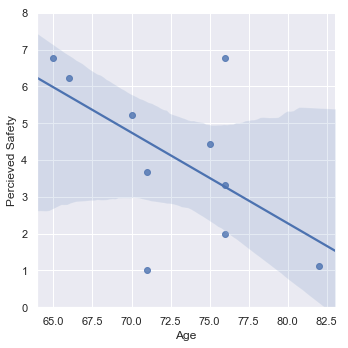

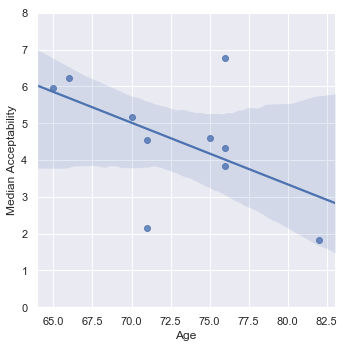

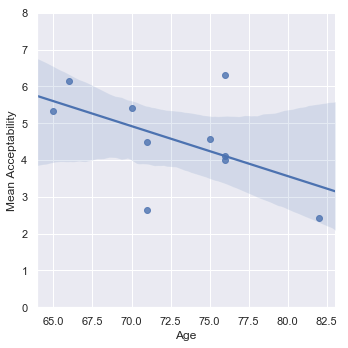

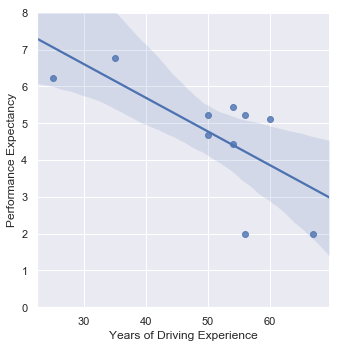

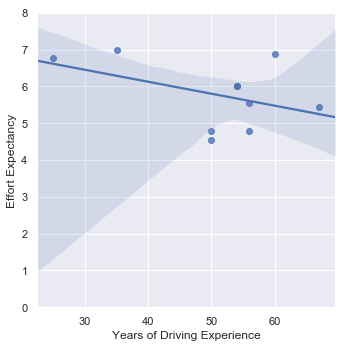

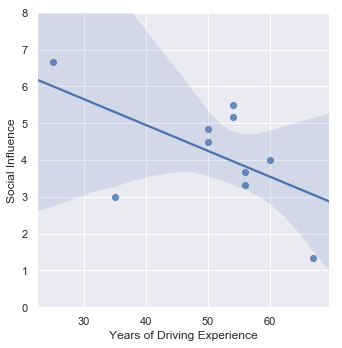

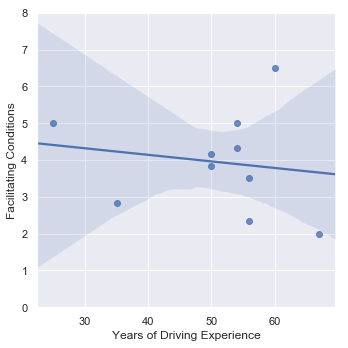

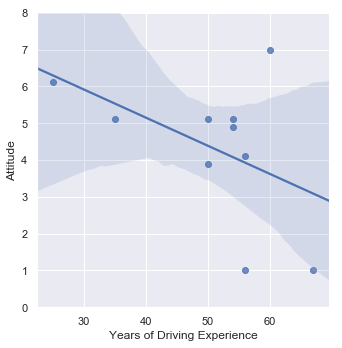

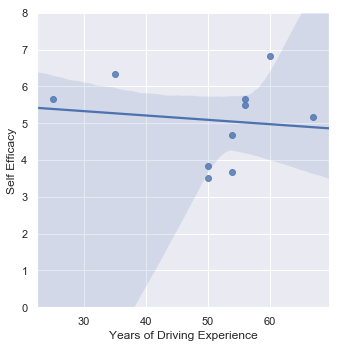

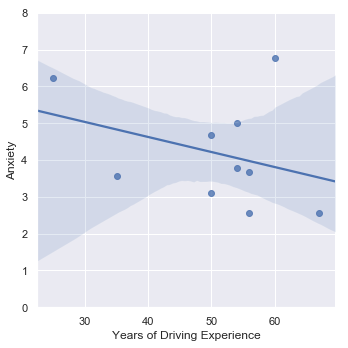

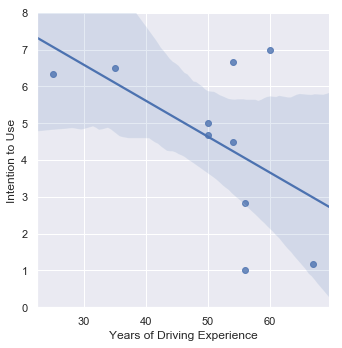

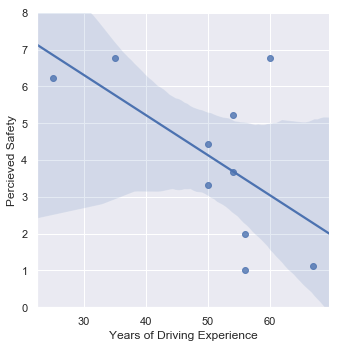

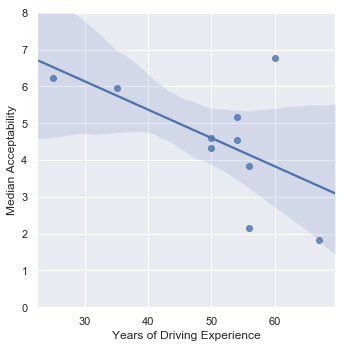

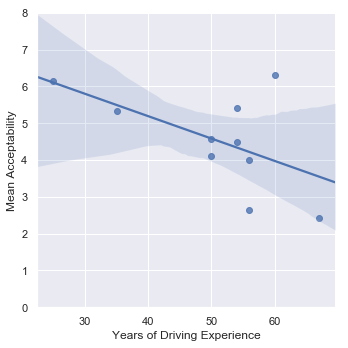

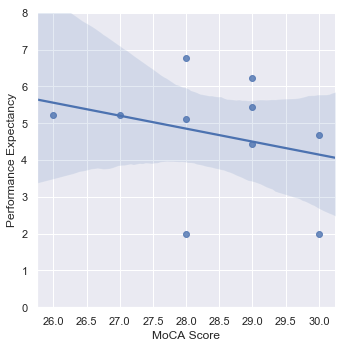

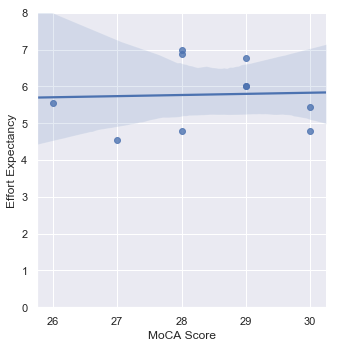

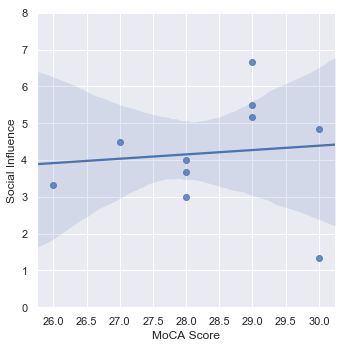

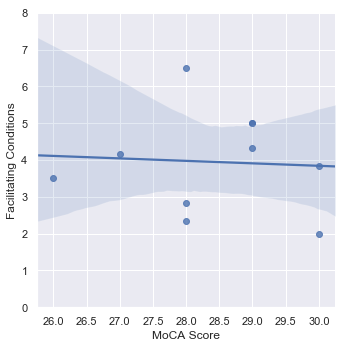

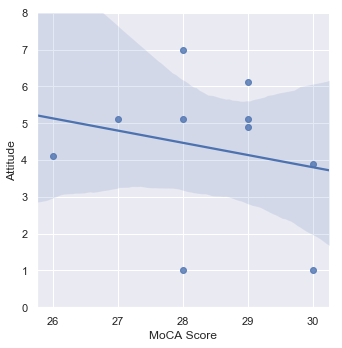

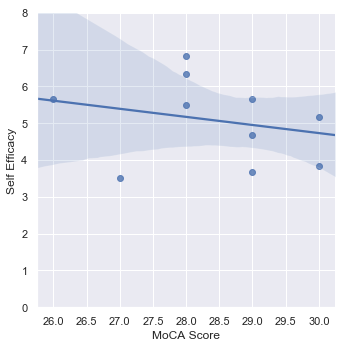

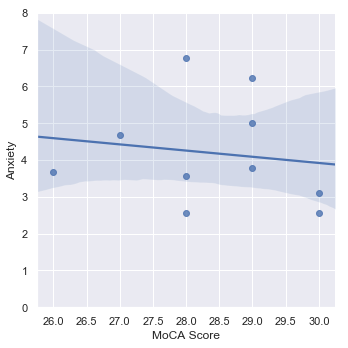

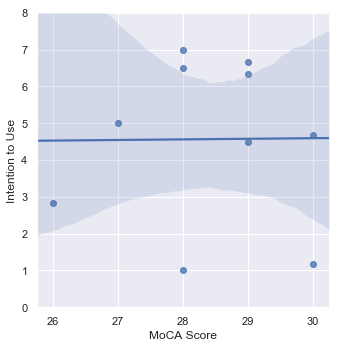

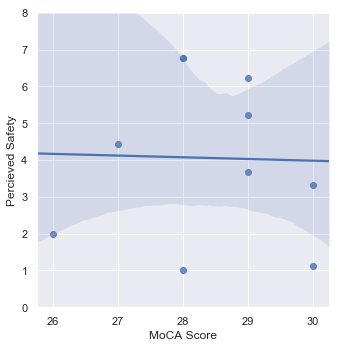

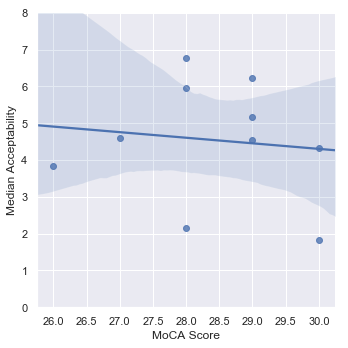

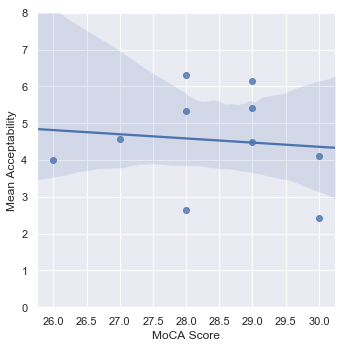

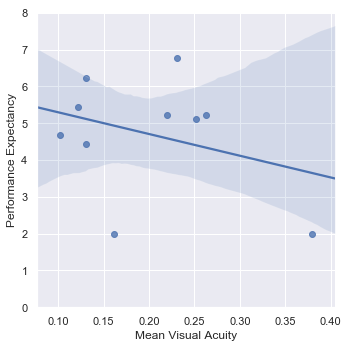

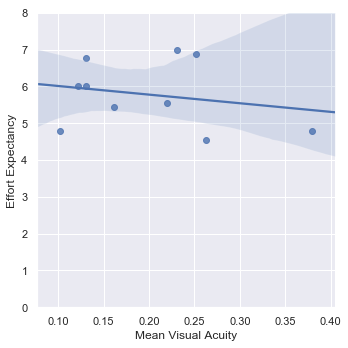

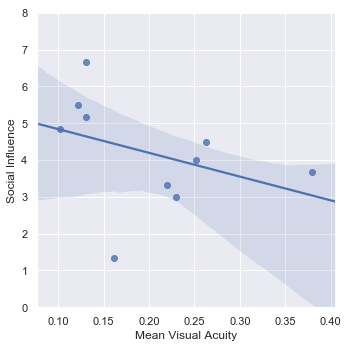

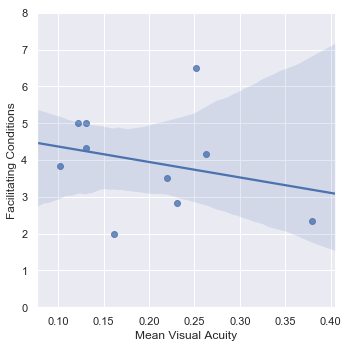

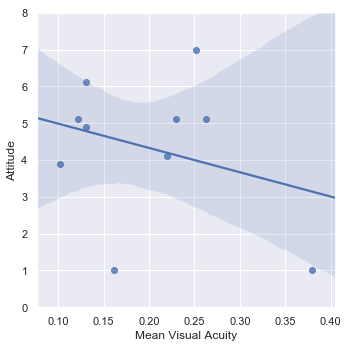

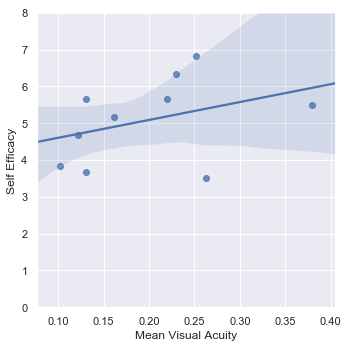

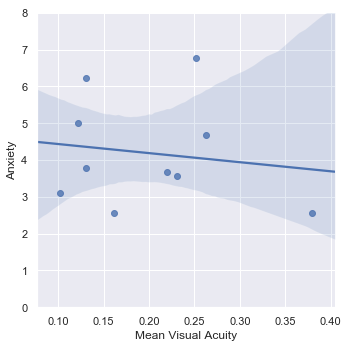

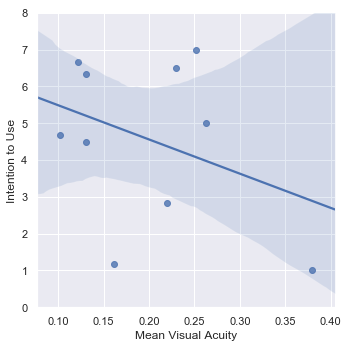

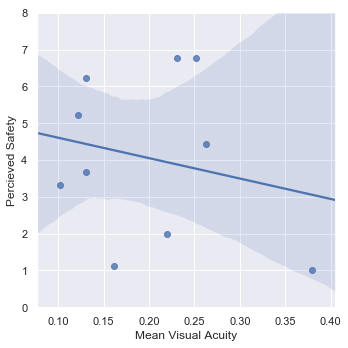

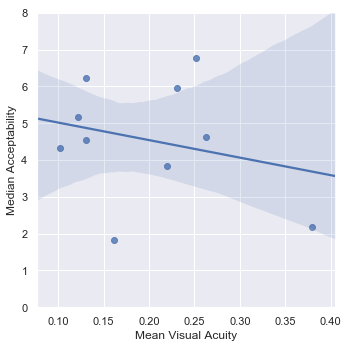

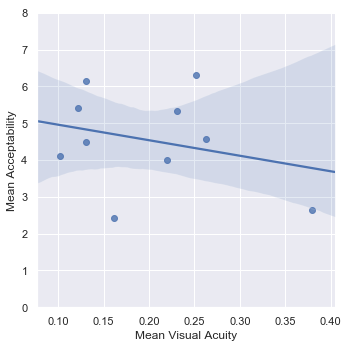

In [320]:
# Now we will concat the *acc_total_complete* with * countable demographics
countable_demographics_measures = ['Age', 'Years of Driving Experience', 'MoCA Score',
                                                    'Mean Visual Acuity']

data = pd.concat([acc_total_per_per_participant, countable_demographics],1)

# Let's draw the regression lines:
sns.set(style="darkgrid")

for x in countable_demographics_measures:
    for y in acc_total_per_per_participant.keys():
        g = (sns.lmplot(x=x, y=y, data = data)).set(ylim = (0,8))

#### 3.4.3 We will be looking at the TOTAL ACC and subscale across driving conditions

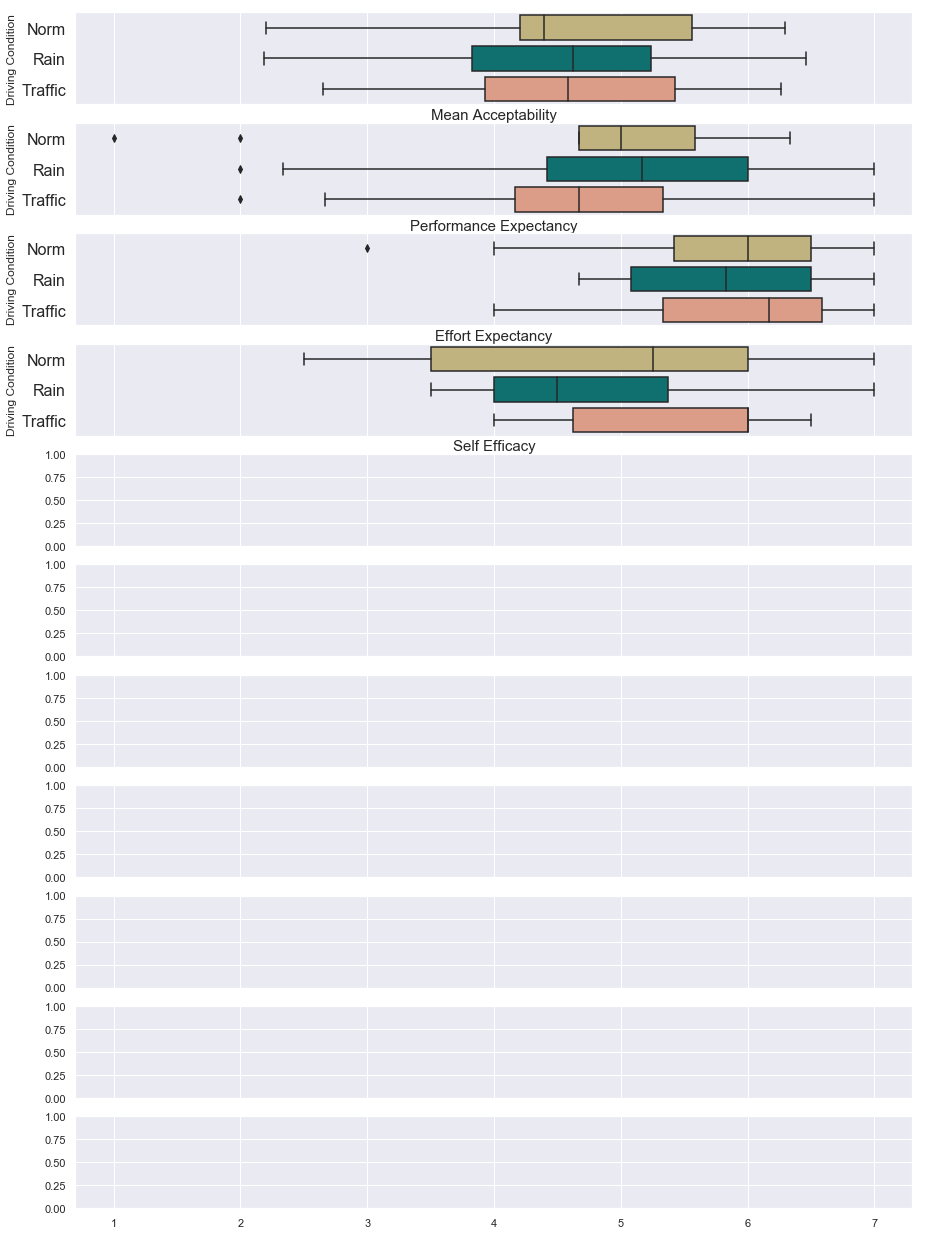

In [333]:
# specifying color for each group
my_pal = {'Norm':'y', 'Rain':'teal', 'Traffic': 'darksalmon'}

figure, axes = plt.subplots(len(acc_total_per_per_participant.keys()),1, figsize = (15,22), sharex= True)
i = 0
report = {"Mean Acceptability", "Performance Expectancy", "Effort Expectancy", "Self Efficacy"}
for x in report:#acc_total_per_per_participant.keys():
    b = sns.boxplot(x=x,y='Driving Condition', data=acc_total_per_scenario,ax = axes[i],orient = "h", palette = my_pal)
    i = i+1 
    b.tick_params(labelsize=16)
    b.set_xlabel(x,fontsize=15)



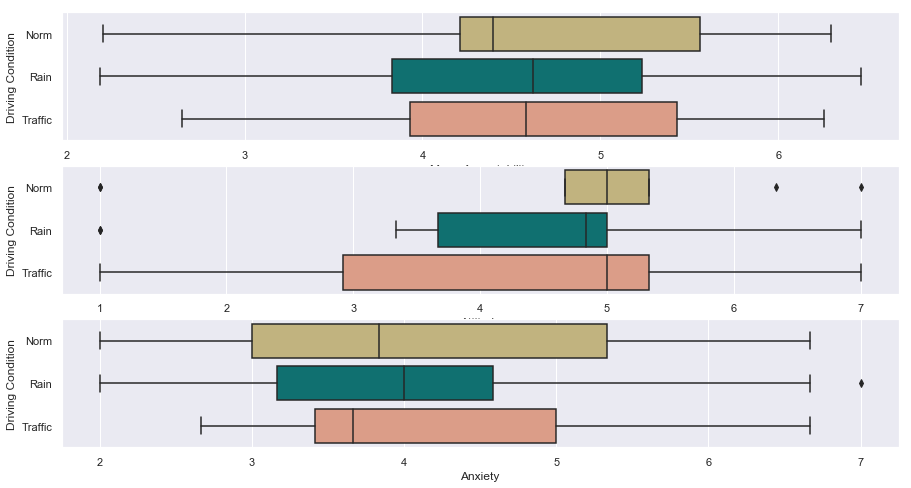

In [411]:
figure, axes = plt.subplots(3,1, figsize = (15,8), sharey= True)
sns.boxplot(x="Mean Acceptability",y='Driving Condition', data=acc_total_per_scenario,ax = axes[0],orient = "h",palette = my_pal)
sns.boxplot(x="Attitude",y='Driving Condition', data=acc_total_per_scenario,ax = axes[1],orient = "h", palette = my_pal)
sns.boxplot(x="Anxiety",y='Driving Condition', data=acc_total_per_scenario,ax = axes[2],orient = "h", palette = my_pal)


Text(0, 0.5, 'Effort Expectancy')

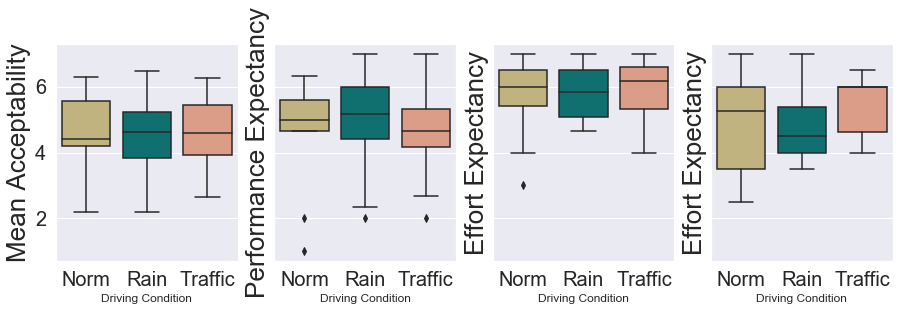

In [363]:
figure, axes = plt.subplots(1,4, figsize = (15,4), sharey= True)
a = sns.boxplot(y="Mean Acceptability",x='Driving Condition', data=acc_total_per_scenario,ax = axes[0], palette = my_pal)
a.tick_params(labelsize=20)
a.set_ylabel("Mean Acceptability",fontsize=26)


b = sns.boxplot(y="Performance Expectancy",x='Driving Condition', data=acc_total_per_scenario,ax = axes[1], palette = my_pal)
b.tick_params(labelsize=20)
b.set_ylabel("Performance Expectancy",fontsize=26)

c = sns.boxplot(y="Effort Expectancy",x='Driving Condition', data=acc_total_per_scenario,ax = axes[2], palette = my_pal)
c.tick_params(labelsize=20)
c.set_ylabel("Effort Expectancy",fontsize=26)


d = sns.boxplot(y="Self Efficacy",x='Driving Condition', data=acc_total_per_scenario,ax = axes[3], palette = my_pal)
d.tick_params(labelsize=20)
d.set_ylabel("Effort Expectancy",fontsize=26)


#### 3.4.4 We will be looking at each scenario's ACC and subscale as a function of demographics

In [294]:
## Saving for later sxport to R
acc_demo_rain = pd.concat([countable_demographics,rain_acc_totals],1).dropna()
acc_demo_trfc = pd.concat([countable_demographics,trfc_acc_totals],1).dropna()
acc_demo_norm = pd.concat([countable_demographics,norm_acc_totals],1).dropna()

acc_demo = pd.concat([acc_demo_norm, acc_demo_rain, acc_demo_trfc ])

In [295]:
acc_demo

,Age,Years of Driving Experience,MoCA Score,Mean Visual Acuity,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Driving Condition
Participant ID,,,,,,,,,,,,,,,,
13.0,70.0,54.0,29.0,0.122216,5.666667,6.000000,5.5,5.0,5.333333,5.0,5.666667,7.0,5.333333,5.500000,5.611111,Norm
19.0,71.0,54.0,29.0,0.130259,4.666667,6.000000,5.0,4.0,4.666667,2.5,3.666667,5.0,3.666667,4.666667,4.351852,Norm
22.0,76.0,50.0,30.0,0.101380,5.000000,5.666667,5.0,3.0,4.666667,3.0,3.000000,4.5,3.666667,4.500000,4.166667,Norm
23.0,76.0,56.0,26.0,0.220159,5.000000,6.000000,4.5,3.0,5.000000,6.0,4.000000,3.5,2.000000,4.500000,4.333333,Norm
25.0,75.0,50.0,27.0,0.262846,5.333333,4.000000,4.5,4.5,5.000000,3.0,4.333333,5.0,4.333333,4.500000,4.444444,Norm
26.0,82.0,67.0,30.0,0.161368,2.000000,5.333333,2.0,2.0,1.000000,5.5,2.000000,1.0,1.000000,2.000000,2.425926,Norm
27.0,66.0,25.0,29.0,0.130259,6.000000,7.000000,7.0,5.0,6.333333,6.0,5.666667,7.0,6.666667,6.333333,6.296296,Norm
28.0,76.0,60.0,28.0,0.251895,4.666667,6.666667,4.0,6.5,7.000000,7.0,6.666667,7.0,6.666667,6.666667,6.240741,Norm
33.0,65.0,35.0,28.0,0.230261,6.333333,7.000000,4.0,3.0,5.333333,7.0,3.000000,6.0,7.000000,6.000000,5.407407,Norm


Which of the ACC scales or total mean or median as a function of countable demographics?Anxiety


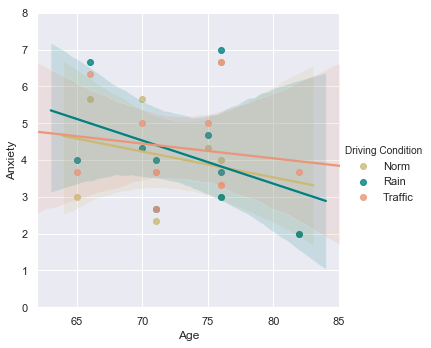

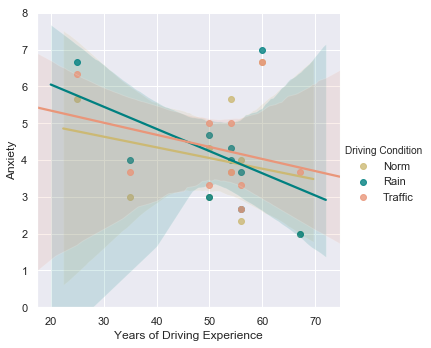

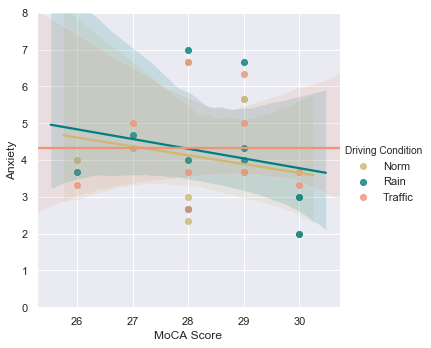

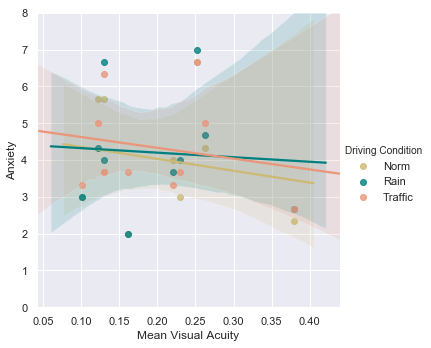

In [296]:
# now we are going to plot 
acc_scale = input("Which of the ACC scales or total mean or median as a function of countable demographics?")
for x in countable_demographics_measures:
    g = (sns.lmplot(x=x, y=acc_scale, hue= "Driving Condition", data=acc_demo, palette = my_pal)).set(ylim = (0,8))

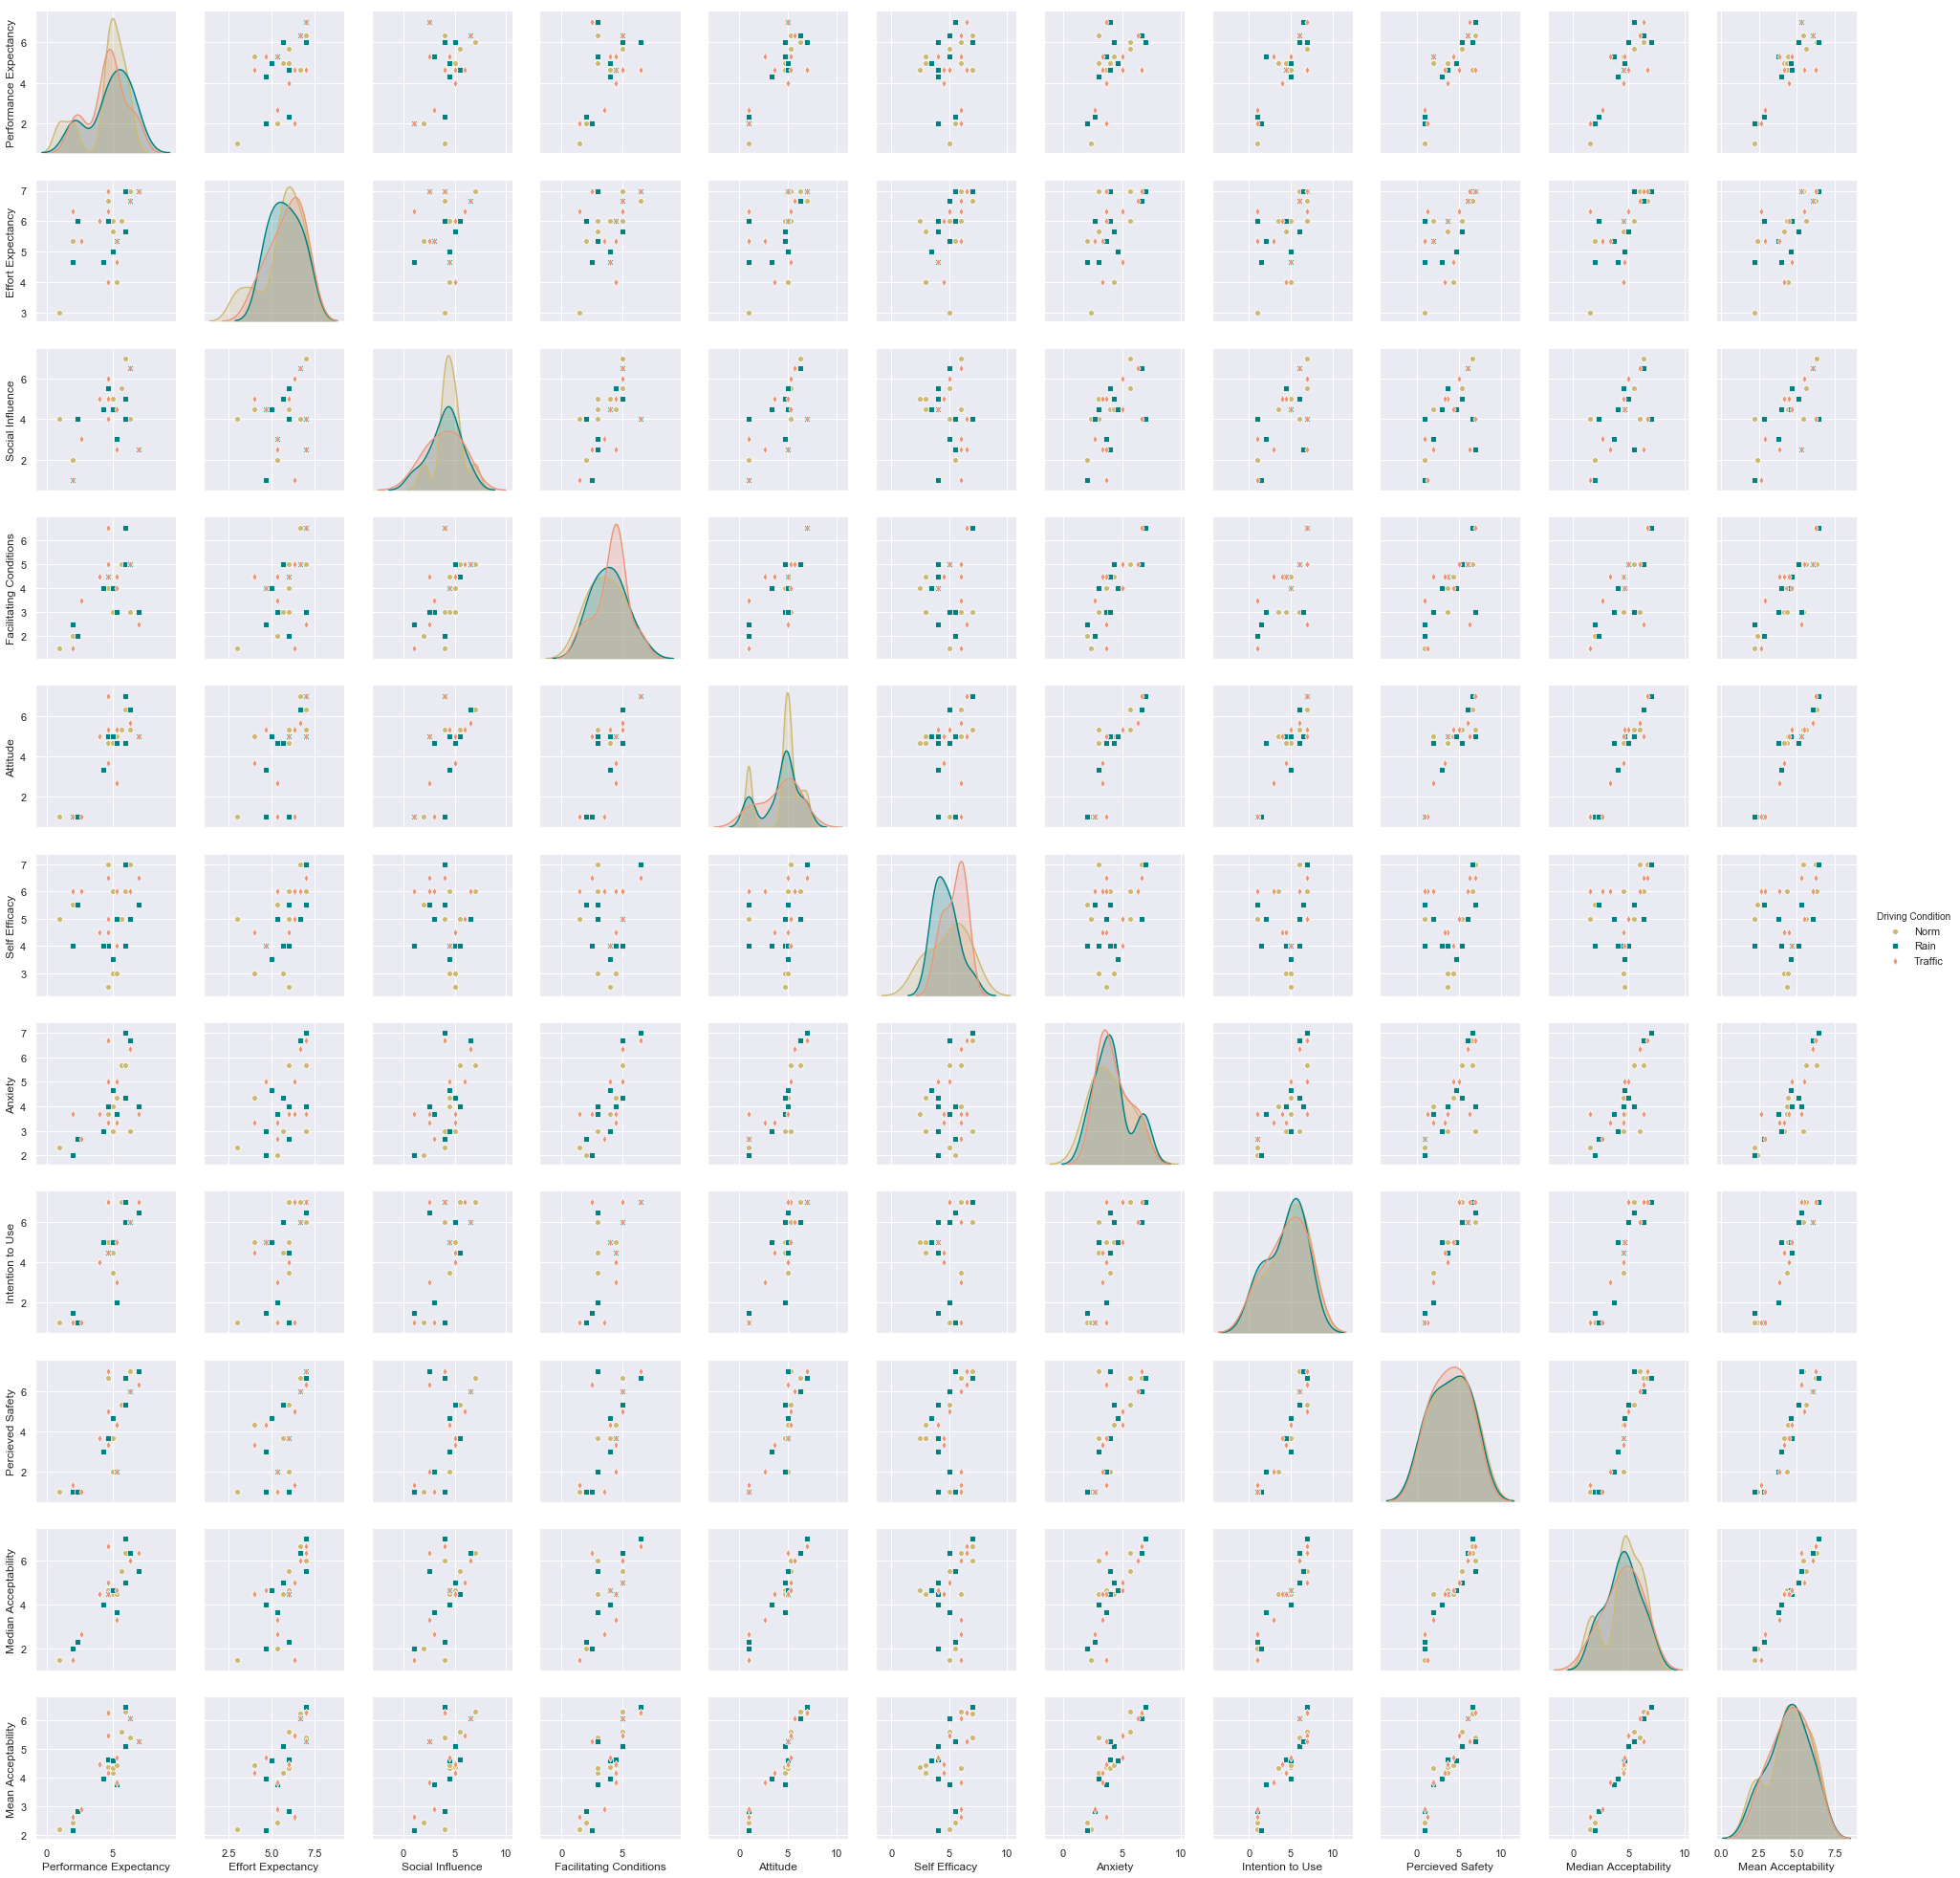

In [297]:
sns.pairplot(acc_total_per_scenario, kind="scatter", hue="Driving Condition", markers=["o", "s", "d"], palette=my_pal)
plt.show()


## C.5 ACC scores and POMS Scores

In [299]:
acc_POMS = pd.concat([acc_total_per_per_participant, POMS_tscores_Analyzed],1).dropna()

In [300]:
acc_POMS

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,,,,,,,,,,,,
13,5.444444,6.000000,5.500000,5.000000,5.111111,4.666667,5.000000,6.666667,5.222222,5.166667,5.401235,49.552289,46.837722,48.085540,44.279224,35.181798,40.830071,48.238339,56.374913
19,4.444444,6.000000,5.166667,4.333333,4.888889,3.666667,3.777778,4.500000,3.666667,4.555556,4.493827,49.552289,46.837722,67.230143,44.279224,49.638580,43.695674,44.715018,53.133432
22,4.666667,4.777778,4.833333,3.833333,3.888889,3.833333,3.111111,4.666667,3.333333,4.333333,4.104938,67.460742,78.460499,67.230143,58.581163,38.795994,46.561277,51.761661,63.938369
23,5.222222,5.555556,3.333333,3.500000,4.111111,5.666667,3.666667,2.833333,2.000000,3.833333,3.987654,62.983629,46.837722,54.467074,44.279224,49.638580,43.695674,76.424910,63.938369
25,5.222222,4.555556,4.500000,4.166667,5.111111,3.500000,4.666667,5.000000,4.444444,4.611111,4.574074,40.598062,46.837722,41.704005,44.279224,46.024385,37.964469,44.715018,49.891951
26,2.000000,5.444444,1.333333,2.000000,1.000000,5.166667,2.555556,1.166667,1.111111,1.833333,2.419753,40.598062,46.837722,48.085540,44.279224,46.024385,58.023688,55.284982,46.650470
27,6.222222,6.777778,6.666667,5.000000,6.111111,5.666667,6.222222,6.333333,6.222222,6.222222,6.135802,49.552289,46.837722,48.085540,72.883102,49.638580,52.292482,44.715018,48.811457
28,5.111111,6.888889,4.000000,6.500000,7.000000,6.833333,6.777778,7.000000,6.777778,6.777778,6.320988,40.598062,46.837722,41.704005,44.279224,67.709558,69.486098,44.715018,31.523558
33,6.777778,7.000000,3.000000,2.833333,5.111111,6.333333,3.555556,6.500000,6.777778,5.944444,5.320988,58.506515,46.837722,41.704005,58.581163,53.252776,60.889290,44.715018,44.489482


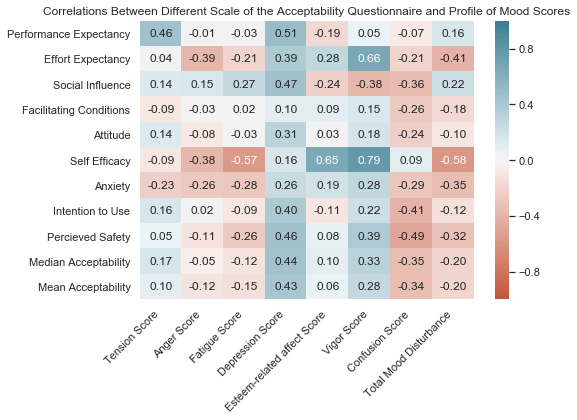

In [306]:
data = acc_POMS.copy()
#data['Anxiety'] = list(8- data['Anxiety'])
acc_POMS_corr = data.corr(method = 'pearson').loc[acc_total_per_per_participant.keys(), POMS_tscores_Analyzed.keys()]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(acc_POMS_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire and Profile of Mood Scores")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [303]:
data

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Tension Score,Anger Score,Fatigue Score,Depression Score,Esteem-related affect Score,Vigor Score,Confusion Score,Total Mood Disturbance
Participant ID,,,,,,,,,,,,,,,,,,,
13,5.444444,6.000000,5.500000,5.000000,5.111111,4.666667,5.000000,6.666667,5.222222,5.166667,5.401235,49.552289,46.837722,48.085540,44.279224,35.181798,40.830071,48.238339,56.374913
19,4.444444,6.000000,5.166667,4.333333,4.888889,3.666667,3.777778,4.500000,3.666667,4.555556,4.493827,49.552289,46.837722,67.230143,44.279224,49.638580,43.695674,44.715018,53.133432
22,4.666667,4.777778,4.833333,3.833333,3.888889,3.833333,3.111111,4.666667,3.333333,4.333333,4.104938,67.460742,78.460499,67.230143,58.581163,38.795994,46.561277,51.761661,63.938369
23,5.222222,5.555556,3.333333,3.500000,4.111111,5.666667,3.666667,2.833333,2.000000,3.833333,3.987654,62.983629,46.837722,54.467074,44.279224,49.638580,43.695674,76.424910,63.938369
25,5.222222,4.555556,4.500000,4.166667,5.111111,3.500000,4.666667,5.000000,4.444444,4.611111,4.574074,40.598062,46.837722,41.704005,44.279224,46.024385,37.964469,44.715018,49.891951
26,2.000000,5.444444,1.333333,2.000000,1.000000,5.166667,2.555556,1.166667,1.111111,1.833333,2.419753,40.598062,46.837722,48.085540,44.279224,46.024385,58.023688,55.284982,46.650470
27,6.222222,6.777778,6.666667,5.000000,6.111111,5.666667,6.222222,6.333333,6.222222,6.222222,6.135802,49.552289,46.837722,48.085540,72.883102,49.638580,52.292482,44.715018,48.811457
28,5.111111,6.888889,4.000000,6.500000,7.000000,6.833333,6.777778,7.000000,6.777778,6.777778,6.320988,40.598062,46.837722,41.704005,44.279224,67.709558,69.486098,44.715018,31.523558
33,6.777778,7.000000,3.000000,2.833333,5.111111,6.333333,3.555556,6.500000,6.777778,5.944444,5.320988,58.506515,46.837722,41.704005,58.581163,53.252776,60.889290,44.715018,44.489482


## 4. Significance

### 4.1 ACC Scores between driving condition
- Dependent Variable: Acceptability Scores and sub-sclae scores

- Independent Variable: Driving Condition (Levels: Normal, Rain) --> One-way ANOVA: Two means are equal

null hypothesis: The means are equal

In [312]:
data = acc_total_per_scenario.copy()
for x in acc_total_per_per_participant.keys():
    print("Effects of Driving Condition on " + x)
    print(stats.f_oneway(data[x][data["Driving Condition"]=="Norm"],data[x][data["Driving Condition"]=="Rain"], 
                                                                            data[x][data['Driving Condition']=="Traffic"]))

Effects of Driving Condition on Performance Expectancy
F_onewayResult(statistic=0.11002785515320326, pvalue=0.8962087605611786)
Effects of Driving Condition on Effort Expectancy
F_onewayResult(statistic=0.08974358974358969, pvalue=0.914437083674901)
Effects of Driving Condition on Social Influence
F_onewayResult(statistic=0.39053948397185306, pvalue=0.6804525488610187)
Effects of Driving Condition on Facilitating Conditions
F_onewayResult(statistic=0.19503386004514672, pvalue=0.8239557425338844)
Effects of Driving Condition on Attitude
F_onewayResult(statistic=0.08542559706062461, pvalue=0.9183685917545378)
Effects of Driving Condition on Self Efficacy
F_onewayResult(statistic=0.934718100890208, pvalue=0.4050360994704317)
Effects of Driving Condition on Anxiety
F_onewayResult(statistic=0.09958280428079075, pvalue=0.9055458987818246)
Effects of Driving Condition on Intention to Use
F_onewayResult(statistic=0.03107960741548528, pvalue=0.9694330270233339)
Effects of Driving Condition on P

In [313]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

## Significance of difference of acc across the three driving conditions

In [314]:
demo_acc = acc_demo.copy()
demo_acc.rename(columns= {"Percieved Safety": "PS","Intention to Use": "IU",'Performance Expectancy':'PE','Effort Expectancy':'EF',
                          'Social Influence': 'SI', 'Facilitating Conditions': 'FC',
                          'Driving Condition': 'Scenario','MoCA Score': 'MoCA', 
                         'Mean Acceptability': 'meanACC', 'Median Acceptability': 'medACC', 
                         "Years of Driving Experience": "YoDE"}, inplace=True)

mod = ols('PS ~ Scenario', data = demo_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

              sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
Scenario    0.096296   2.0  0.048148  0.009788  0.990263  0.000725  -0.07068
Residual  132.811111  27.0  4.918930       NaN       NaN       NaN       NaN


## Significance of diffference of acc scales in paired driving conditions (N vs.T) & (N vs. R)

In [134]:
condition = "Traffic"##Condition not considered (if condition = Traffic, difference between R & N)

paired = demo_acc.copy()
paired = paired[paired.Scenario != condition]
    
mod = ols('medACC ~ Scenario', data = paired_N_T).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)

print(anova_table(aov_table))

             sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
Scenario   0.068056   1.0  0.068056  0.024886  0.876408  0.001381 -0.051255
Residual  49.225000  18.0  2.734722       NaN       NaN       NaN       NaN


## Significance of ACC difference across demographics

In [315]:
mod = ols("meanACC ~ YoDE", data = demo_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

             sum_sq    df    mean_sq          F    PR(>F)    eta_sq  omega_sq
YoDE      14.802178   1.0  14.802178  12.550079  0.001411  0.309496   0.27798
Residual  33.024571  28.0   1.179449        NaN       NaN       NaN       NaN


## Significance of ACC differnece (Self Efficacy) with POMS (vigor)

In [323]:
POMS_acc = acc_POMS.copy()
POMS_acc.rename(columns= {"Percieved Safety": "PS","Intention to Use": "IU",'Performance Expectancy':'PE','Effort Expectancy':'EF',
                          'Social Influence': 'SI', 'Facilitating Conditions': 'FC',
                          'Tension Score': 'Tension','Anger Score': 'Anger', 
                         'Vigor Score': 'Vigor', 'Median Acceptability': 'medACC', "Self Efficacy": "SE", 
                         "Total Mood Disturbance": "TMD"}, inplace=True)

mod = ols('Vigor ~ SE', data = POMS_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

              sum_sq   df     mean_sq         F    PR(>F)    eta_sq  omega_sq
SE        555.109489  1.0  555.109489  12.87619  0.007102  0.616788  0.542882
Residual  344.890511  8.0   43.111314       NaN       NaN       NaN       NaN


C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


- sum_sq: The sum of squares for the model is how much variance is explained by our proposed Invariable and how much of it remains unexplained. 
- 